In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.1 MB/s eta 0:00:00a 0:00:01


In [3]:
from ultralytics import YOLO
print("YOLO installed successfully")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO installed successfully


In [4]:
import yaml

# Define your data as a Python dictionary
data = {
    'train': '/kaggle/input/yolo-garbage/train/images',
    'val': '/kaggle/input/yolo-garbage/valid/images',
    'nc': 2,
    'names': ['garbage', 'non-garbage']
}

# Open a file in write mode and dump the dictionary to it as YAML
with open('custom_config.yaml', 'w') as f:
    yaml.dump(data, f)


In [5]:
!cat /kaggle/working/custom_config.yaml


names:
- garbage
- non-garbage
nc: 2
train: /kaggle/input/yolo-garbage/train/images
val: /kaggle/input/yolo-garbage/valid/images


In [6]:
model = YOLO("yolov8n.pt")


In [7]:
model.train(
    data="/kaggle/working/custom_config.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/custom_config.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78f1a4a32e40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [9]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

results = model.predict(
    source="/kaggle/input/yolo-garbage/test/images",
    save=True,
    conf=0.25
)



image 1/370 /kaggle/input/yolo-garbage/test/images/-_jpg.rf.a80abcfbf4fc40231aa217c3a72a9bbb.jpg: 640x640 1 non-garbage, 7.3ms
image 2/370 /kaggle/input/yolo-garbage/test/images/-long-la-rue-C3A0-astoria-queens-new-york-un-tas-d-une-et-trottoir-213599590_jpg.rf.25d57d42e7b7b81851a2827126169ca9.jpg: 640x640 1 garbage, 7.3ms
image 3/370 /kaggle/input/yolo-garbage/test/images/001-DSC03192-900x675-1-_jpg.rf.33b6420557c715c9caf2499f8cfc623e.jpg: 640x640 1 non-garbage, 7.2ms
image 4/370 /kaggle/input/yolo-garbage/test/images/05-_RESAH_jpg.rf.f116712414440fb75c12f20b7b856f8f.jpg: 640x640 1 garbage, 7.2ms
image 5/370 /kaggle/input/yolo-garbage/test/images/0_The-rubbish-left-behind-in-Sefton-ParkPic-Andrew-Teebay_jpg.rf.bd247008574e6a1eb01b830c49f0c3f6.jpg: 640x640 1 garbage, 7.2ms
image 6/370 /kaggle/input/yolo-garbage/test/images/0bd7f188-679f-11e5-b0e3-40f2e96c8ad8_jpg.rf.88aa897a29b89b91984b60bd95488b11.jpg: 640x640 1 garbage, 7.2ms
image 7/370 /kaggle/input/yolo-garbage/test/images/112295

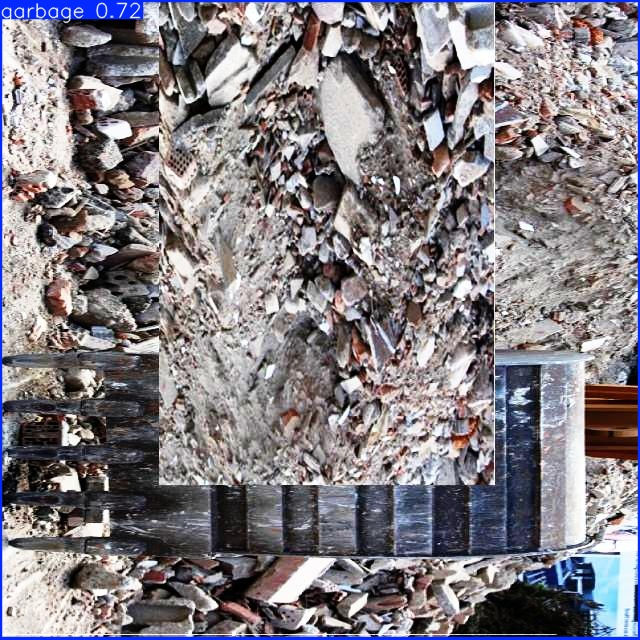

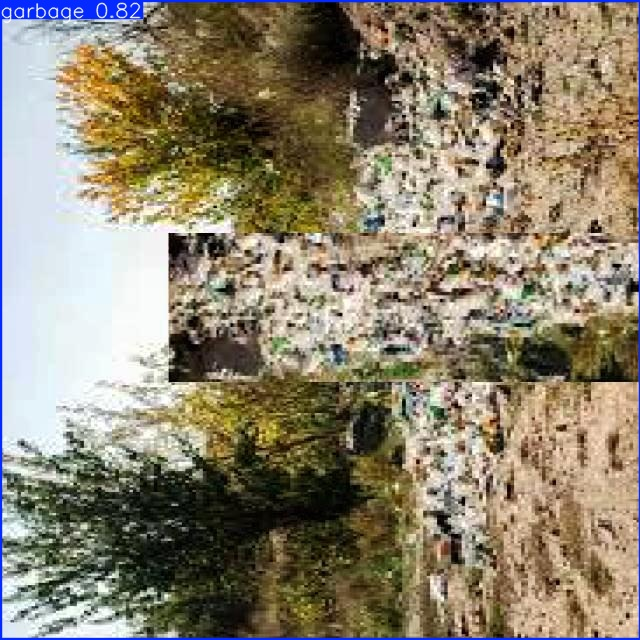

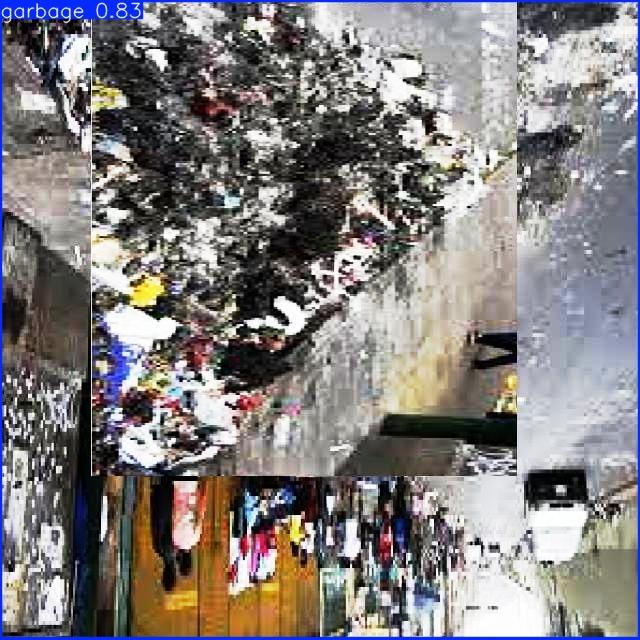

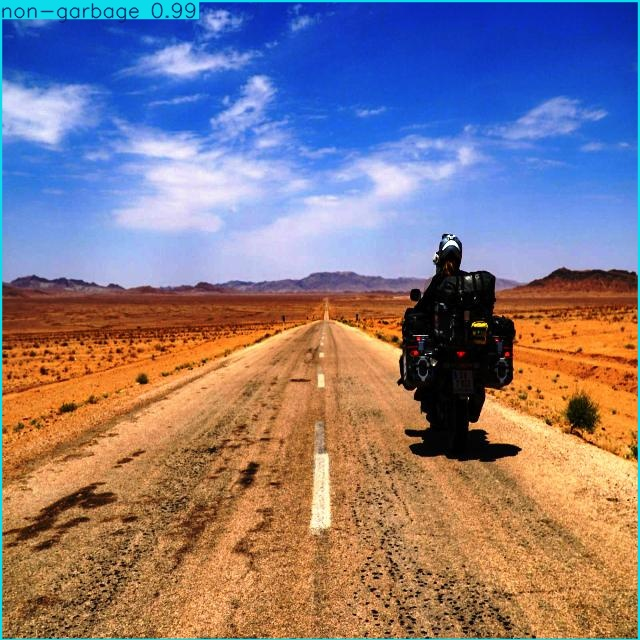

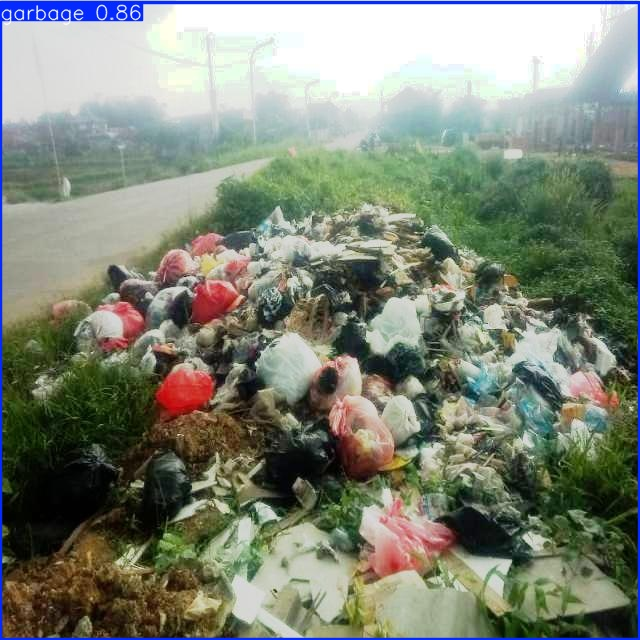

In [10]:
from IPython.display import Image, display
import os

PRED_PATH = "/kaggle/working/runs/detect/predict"

for img in os.listdir(PRED_PATH)[:5]:
    display(Image(filename=os.path.join(PRED_PATH, img)))
